## Make a `well`

In [1]:
from striplog import Well
print(Well.__doc__)


    Well contains everything about the well. It inherits from
    las.LASReader.

    For example, well will contain header fields, curves, and
    other data from the 'basic' LAS file.

    We will then read supplementary LAS files, and/or maybe CSV
    data, into one main other attribute of Well: the striplog.

    If we start using pandas dataframes, this is the place to
    do it.

    Args:
        f (str): The path to an LAS file.
        null_subs (float): Something to substitute for the declared
            null value, which is probably -999.25. Often it's convenient
            to use np.nan.
        unknown_as_other (bool): Whether you'd like to load unknown
            sections as plain text blocks. A hack to cope with LAS3 files
            without having to handle arbitrary sections.

    Note:
        This module is not very general. It was written to support a very
        specific workflow. If it seems to be useful for other things,
        we can come back and try to 

In [2]:
fname = 'P-129_out.LAS'
well = Well(fname)

In [3]:
well.data['GR']

array([ 46.69865036,  46.69865036,  46.69865036, ...,  92.24622345,
        92.24622345,  92.24622345])

In [4]:
well.well.DATE.data

'10-Oct-2007'

## Make a `striplog` and add it to the `well`

In [5]:
from striplog import Striplog, Legend
legend = Legend.default()

In [6]:
f = 'P-129_280_1935.png'
name, start, stop = f.strip('.png').split('_')
striplog = Striplog.from_img(f, float(start), float(stop), legend=legend, tolerance=35)

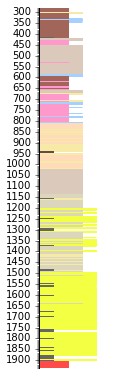

In [7]:
%matplotlib inline
striplog.plot(legend, ladder=True, interval=(5,50), aspect=5)

In [8]:
well.add_striplog(striplog, "striplog")

Striplogs are added as a dictionary, but you can access them via attributes too:

In [9]:
well.striplog

{'striplog': Striplog(185 Intervals, start=280.0, stop=1935.0)}

In [10]:
well.striplog.striplog.source

'Image'

In [11]:
well.striplog.striplog.start

280.0

## Make another `striplog` and add it

We can also make `striplog`s from cuttings data, for example. So let's read cuttings data from an Excel spreadsheet and add another striplog to the well. 

In [12]:
import xlrd

In [13]:
xls = "_Cuttings.xlsx"

In [14]:
book = xlrd.open_workbook(xls)
sh = book.sheet_by_name("P-129")

In [15]:
tops = [c.value for c in sh.col_slice(0, 4)]
bases = [c.value for c in sh.col_slice(1, 4)]
descr = [c.value for c in sh.col_slice(3, 4)]

rows = [i for i in zip(tops, bases, descr)]
rows[:5]

[(280.0,
  282.0,
  'Siltstone: red to red brown, grading to very fine lower sandstone, very slightly calcareous, sandy throughout, poor porosity'),
 (282.0,
  299.5,
  'Sandstone: orange brown to white, fine lower to medium lower grained, sub angular to sub rounded, moderate to well sorted, interbeds of light grey shale and red brown siltstone, poor to fair porosity, Sneider 1D'),
 (299.5,
  315.0,
  'Siltstone: red to red brown, grading to very fine lower sandstone, very slightly calcareous, sandy throughout, poor porosity, local lenses and stringers of sandstone, as above'),
 (315.0,
  328.0,
  'Siltstone: red to red brown, grading to very fine lower sandstone, very slightly calcareous, sandy throughout, poor porosity, local lenses and stringers of sandstone, as above'),
 (328.0,
  340.0,
  'Siltstone: as above with inter beds of light grey limestone, mudstone, microcrystalline, silty locally, tight')]

In [16]:
from striplog import Lexicon
lexicon = Lexicon.default()

In [17]:
cuttings = Striplog.from_array(rows, lexicon)
cuttings

Striplog(155 Intervals, start=280.0, stop=1935.0)

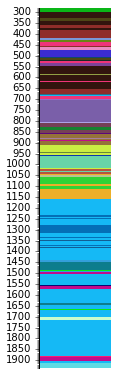

In [18]:
cuttings.plot(interval=(5,50), aspect=5)

In [19]:
print(cuttings[:5])

top: 280.0, base: 282.0, description: 'Siltstone: red to red brown, grading to very fine lower sandstone, very slightly calcareous, sandy throughout, poor porosity', components: [Component("colour":"red", "lithology":"siltstone", "grainsize":"very fine")]
top: 282.0, base: 299.5, description: 'Sandstone: orange brown to white, fine lower to medium lower grained, sub angular to sub rounded, moderate to well sorted, interbeds of light grey shale and red brown siltstone, poor to fair porosity, Sneider 1D', components: [Component("colour":"brown", "amount":"interbeds", "lithology":"sandstone", "grainsize":"fine")]
top: 299.5, base: 315.0, description: 'Siltstone: red to red brown, grading to very fine lower sandstone, very slightly calcareous, sandy throughout, poor porosity, local lenses and stringers of sandstone, as above', components: [Component("colour":"red", "amount":"stringers", "lithology":"siltstone", "grainsize":"very fine")]
top: 315.0, base: 328.0, description: 'Siltstone: red

In [20]:
well.add_striplog(cuttings, "cuttings")

In [21]:
well.striplog.cuttings[3:5]

Striplog(2 Intervals, start=315.0, stop=340.0)

## Export to LAS 3.0

In [22]:
print(well.striplogs_to_las3(use_descriptions=True))

~Version
VERS .              3.0       :CWLS LOG ASCII STANDARD - VERSION 3.0
WRAP .               NO       :ONE LINE PER DEPTH STEP
DLM  .            COMMA       :DELIMITING CHARACTER
PROG .       striplog.py      :LAS Program name and version
CREA . 2015/07/09 16:29       :LAS Creation date {YYYY/MM/DD hh:mm}

~Well
#MNEM .UNIT  DATA             DESCRIPTION
#---- ------ --------------   -----------------------------
STRT .M         1.067         :START DEPTH
STOP .M      1939.138         :STOP DEPTH
STEP .M      -999.2500        :STEP
NULL .       -999.2500        :NULL VALUE

WELL .       Kennetcook #2         :WELL
FLD  .       UNDEFINED             :FIELD
CTRY .       CA                    :COUNTRY

PROV .       NOVA SCOTIA           :PROVINCE
UWI  .       Long = 63* 45'24.460  W :UNIQUE WELL ID
LIC  .       P-129                 :LICENSE NUMBER

~Parameter
#MNEM .UNIT  VALUE            DESCRIPTION
#---- ------ --------------   -----------------------------

#Required parameters
R

## Reading from LAS files

In [23]:
fname = 'P-129_striplog_from_image.las'
p129 = Well(fname, lexicon=lexicon, unknown_as_other=True)

In [24]:
p129.striplog

{'lithology': Striplog(185 Intervals, start=280.0, stop=1935.0)}

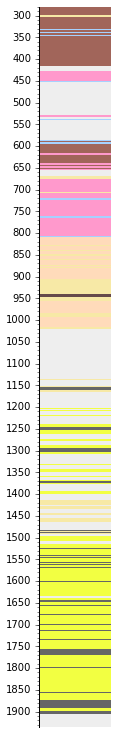

In [25]:
p129.striplog.lithology.plot(legend, interval=(10,50))

## Plotting with logs

In [26]:
import matplotlib.pyplot as plt

Now we have all the well data in one place, we should be able to make some nice plots. For example, use the striplog in a log plot, or use the striplog to define categories for colouring a cross-plot.

First, let's try filling an ordinary curve – the GR log — with lithlogy colours. A classic workaround for this is to plot the striplog, then plot the GR log, then fill the GR log with white to mask the striplog.

In [27]:
z = well.data['DEPT']
log = well.data['GR']

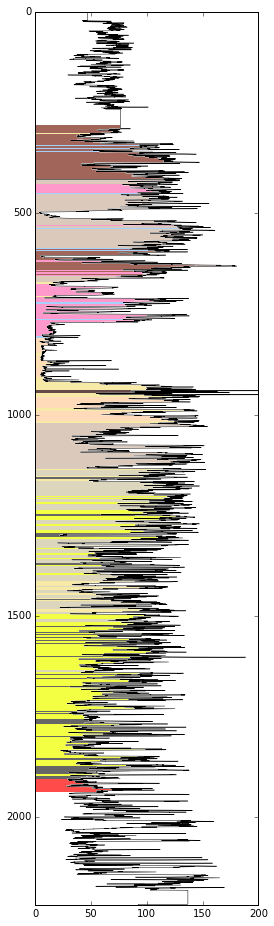

In [32]:
lineweight = 0.5

plot_min = 0
plot_max = 200
    
# Set up the figure. 
fig = plt.figure(figsize=(4,16))

# Plot into the figure.
# First, the lith log, the full width of the log. 
ax = fig.add_subplot(111)
well.striplog.striplog.plot_axis(ax, legend, default_width=plot_max)

# Plot the DT with a white fill to fake the curve fill.
ax.plot(log, z, color='k', lw=lineweight)
ax.fill_betweenx(z, log, plot_max, color='w', zorder = 2)

# Limit axes. 
ax.set_xlim(plot_min, plot_max)
ax.set_ylim(z[-1], 0)

# Show the figure.
#plt.savefig('/home/matt/filled_log.png')
plt.show()

## Crossplots

Now let's try a cross-plot. To facilitate this, generate a new log with the **`striplog.to_log()`** method:

In [33]:
z, lith = well.striplog.striplog.to_log(start=well.start, stop=well.stop, step=well.step, legend=legend)

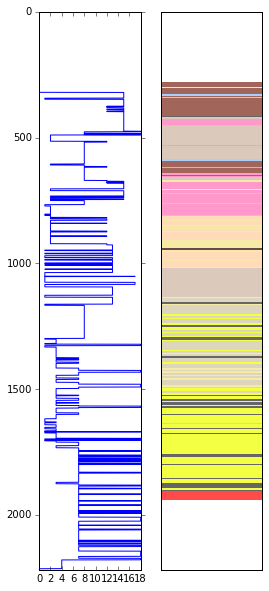

In [35]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(4, 10))

ax = fig.add_subplot(121)
ax.plot(lith, z)
ax.set_ylim(z[-1], 0)
ax.get_yaxis().set_tick_params(direction='out')

ax2 = fig.add_subplot(122)
striplog.plot_axis(ax2, legend=legend)
ax2.set_ylim(z[-1], 0)
ax2.get_xaxis().set_ticks([])
ax2.get_yaxis().set_ticks([])

#plt.savefig('/home/matt/discretized.png')
plt.show()

Next step: make a colourmap from the legend. This could be a method of the `legend`, but it's so easy it hardly seems worth the trouble.

In [36]:
import matplotlib.colors as clr
cmap = clr.ListedColormap([i.colour for i in legend])

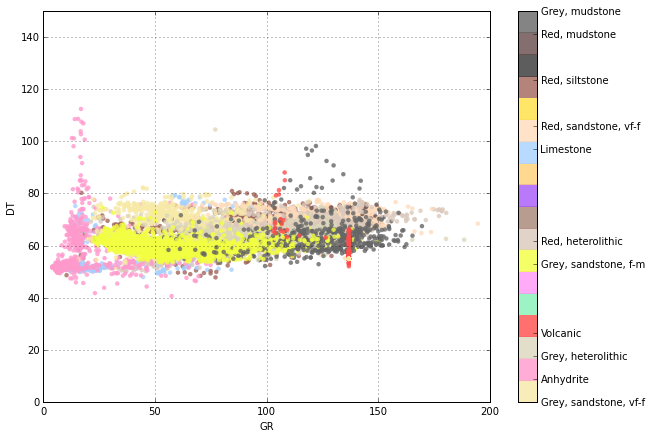

In [37]:
plt.figure(figsize=(10,7))

plt.scatter(well.data['GR'], well.data['DT'],
            c=lith,
            edgecolors='none',
            alpha=0.8,
            cmap=cmap, vmin=1)

plt.xlim(0, 200); plt.ylim(0,150)
plt.xlabel('GR'); plt.ylabel('DT')
plt.grid()

ticks = [int(i) for i in list(set(lith))]
ix = [int(i)-1 for i in list(set(lith)) if i]
labels  = [i.component.summary() for i in legend[ix]]

cbar = plt.colorbar()
cbar.set_ticks(ticks)
cbar.set_ticklabels(labels)

plt.show()

We can get a bit fancier still:

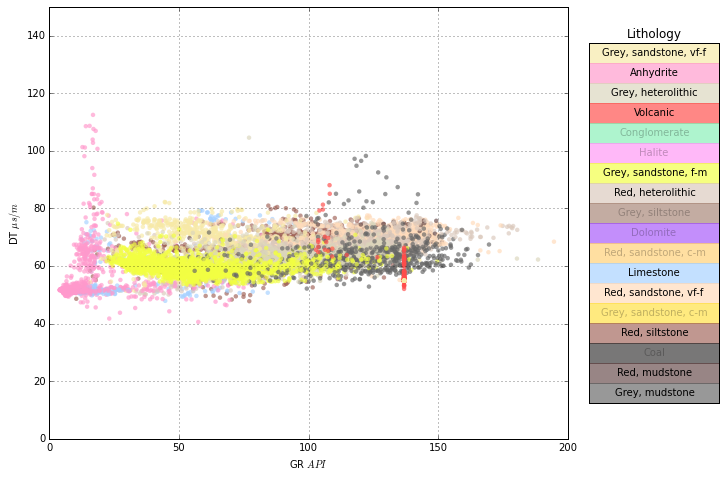

In [39]:
from matplotlib.patches import Rectangle

# Start the plot. 
fig = plt.figure(figsize=(12,10))

# Crossplot. 
ax = fig.add_axes([0.15,0.15,0.6,0.6])
ax.scatter(well.data['GR'], well.data['DT'],
           c=lith, edgecolors='none', alpha=0.67,
           cmap=cmap, vmin=1)
ax.set_xlim(0, 200); plt.ylim(0,150)
ax.set_xlabel('GR $API$'); ax.set_ylabel(r'DT $\mu s/m$')
ax.grid()

# Draw the legend.
axc = fig.add_axes([0.775,0.2,0.15,0.5])

i = 0
for d in legend:
    if i+1 in lith:
        tcolour = 'k'
        talpha = 1.0
        tstyle = 'medium'        
    else:
        tcolour = 'k'
        talpha = 0.25
        tstyle = 'normal'
        
    rect = Rectangle((0, i),
                      1, 1, 
                      color=d.colour, 
                      alpha=0.67 )
    axc.add_patch(rect)
    text = axc.text(0.5, 0.5+i,
                    d.component.summary(default="Unassigned"), 
                    color=tcolour, ha='center', va='center',
                    fontsize=10, weight=tstyle, alpha=talpha)
    i += 1

axc.set_xlim(0,1); axc.set_ylim(len(legend), 0)
axc.set_xticks([]); axc.set_yticks([])
axc.set_title('Lithology', fontsize=12)

# Finish.
#plt.savefig('/home/matt/crossplot.png')
plt.show()

<hr />

<p style="color:gray">©2015 Agile Geoscience. Licensed CC-BY. <a href="https://github.com/agile-geoscience/striplog">striplog.py</a></p>